In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, classification_report
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('labelBaru_II.csv')

In [4]:
newdf = df.drop(["Unnamed: 0","label"], axis=1)
newdf.head()

,tanggal,heading,aircraft_code,registration,callsign,avg_elevation,avg_altitude_m,avg_diff_vs
0,9/26/2022,18,B739,PK-LGR,LNI276,5.818741,233.449091,46.545455
1,9/26/2022,36,B739,PK-LHQ,LNI140,6.300770,201.583636,81.454545
2,9/26/2022,36,A320,PK-SJU,SJV837,8.316118,184.052308,157.538462
3,9/26/2022,36,A320,PK-GLY,CTV938,5.656915,195.349091,110.545455
4,9/26/2022,36,AT76,PK-WJP,WON1243,7.655067,186.145714,36.571429


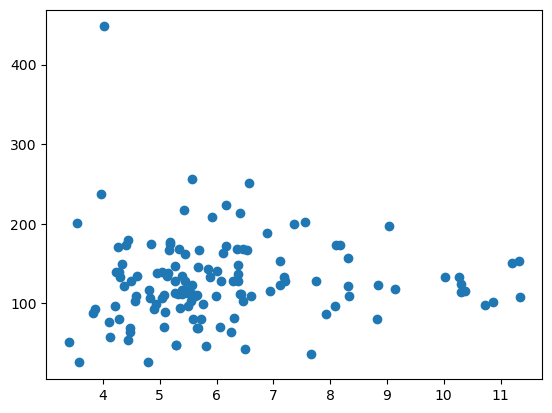

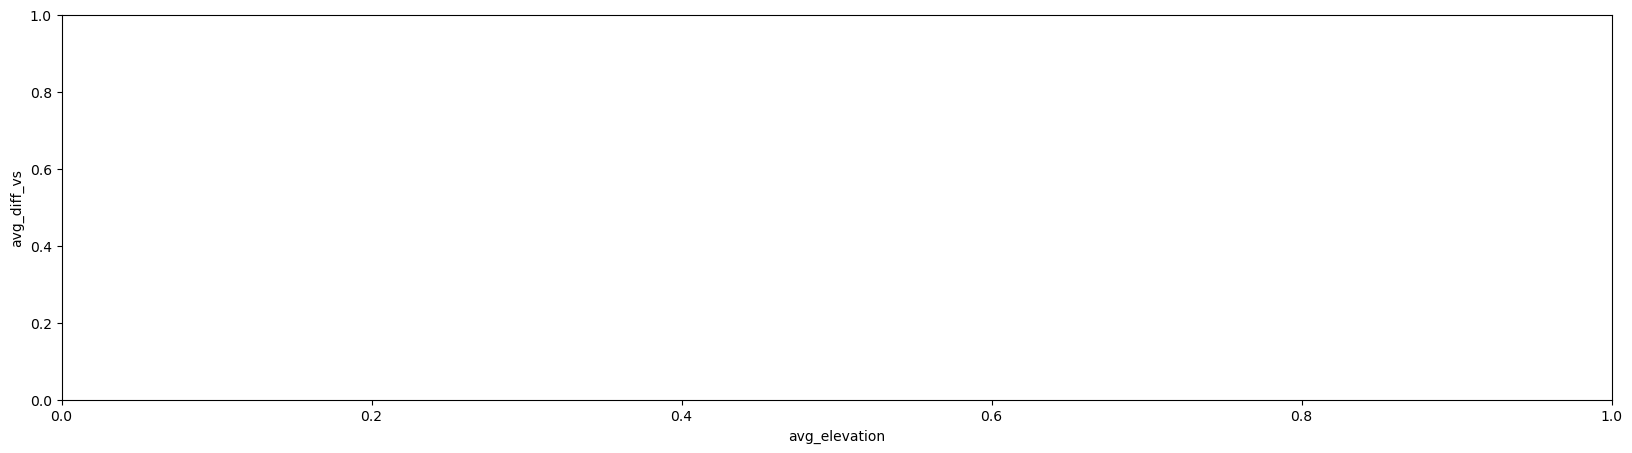

In [5]:
plt.scatter(newdf['avg_elevation'],newdf['avg_diff_vs'])
plt.figure(figsize=(20, 5))
plt.xlabel("avg_elevation")
plt.ylabel("avg_diff_vs")
plt.show()

In [6]:
x = newdf.iloc[ :,  lambda df: [5, 7]]
x

,avg_elevation,avg_diff_vs
0,5.818741,46.545455
1,6.300770,81.454545
2,8.316118,157.538462
3,5.656915,110.545455
4,7.655067,36.571429
...,...,...
126,5.475700,113.230769
127,3.859506,93.090909
128,3.397694,51.200000
129,3.542663,201.142857


Elbow Method to determine the number of clusters to be formed:


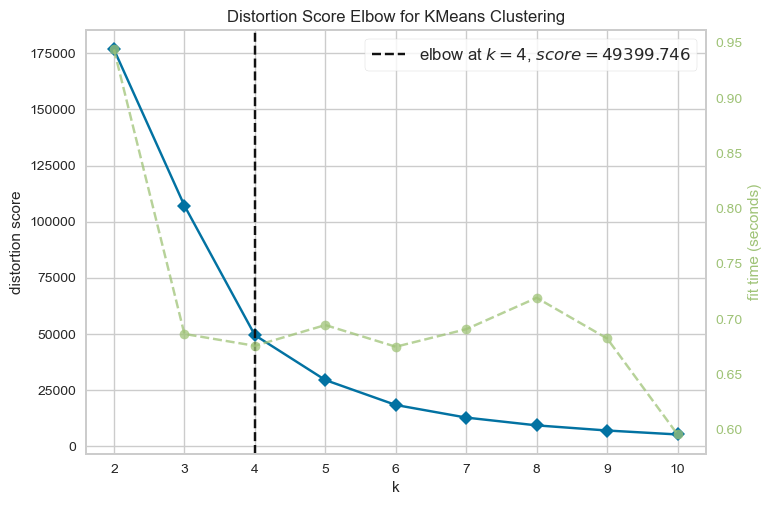

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Elbow Method using KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(x)  # Assuming m2 is your dataset
Elbow_M.show()


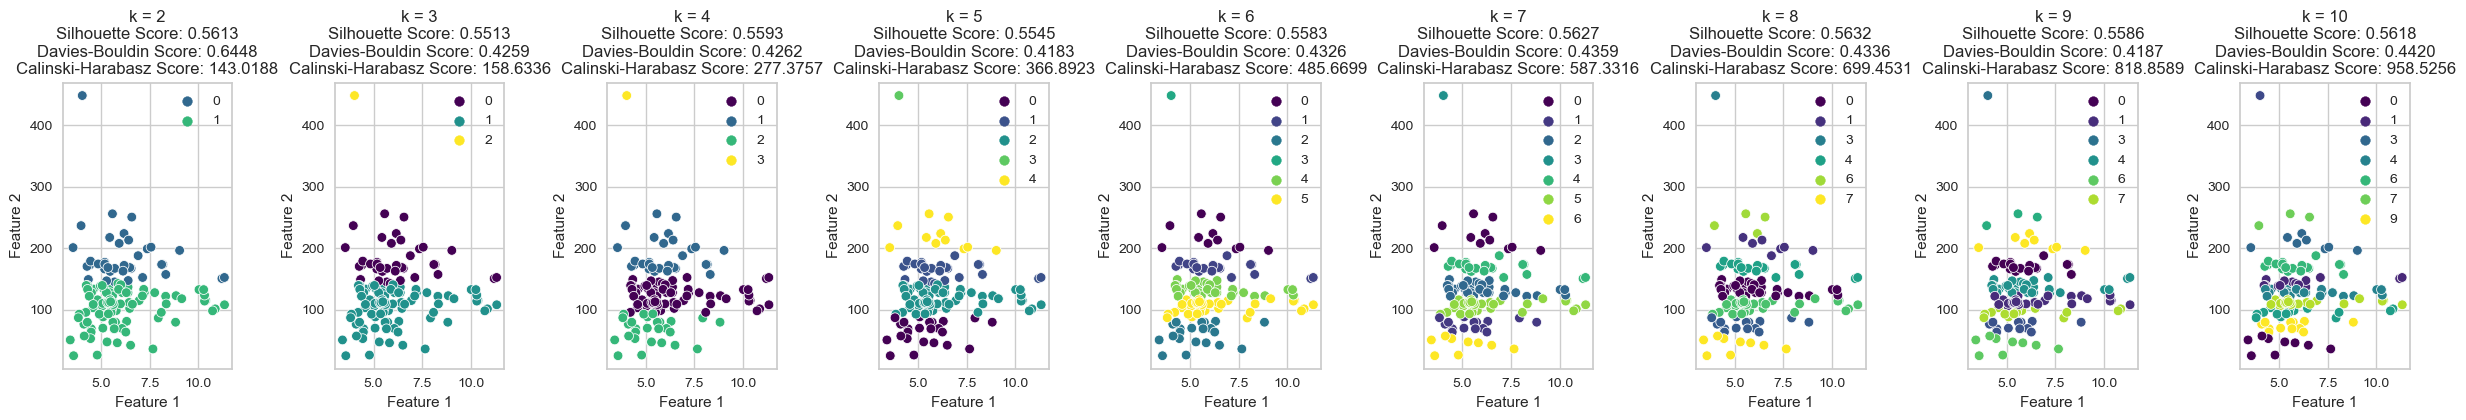

In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmax = 10

# Increase the width of each subplot for better spacing
fig, axes = plt.subplots(nrows=1, ncols=kmax-1, figsize=(25, 5))

# Scores for each k
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_

    sil_score = silhouette_score(x, labels, metric='euclidean')
    db_score = davies_bouldin_score(x, labels)
    ch_score = calinski_harabasz_score(x, labels)

    plt.subplot(1, kmax-1, k-1)
    sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=labels, palette='viridis')
    plt.title(f'k = {k}\nSilhouette Score: {sil_score:.4f}\nDavies-Bouldin Score: {db_score:.4f}\nCalinski-Harabasz Score: {ch_score:.4f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)
plt.show()

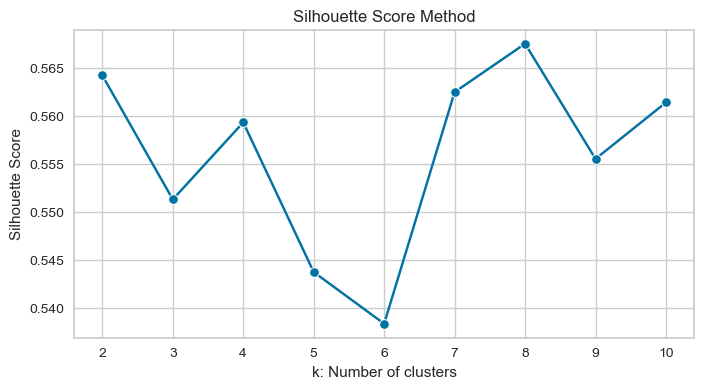

In [9]:
from sklearn.metrics import silhouette_score

# Silhouette Score Method
sil_scores = []
kmax = 10

for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    sil_score = silhouette_score(x, labels, metric='euclidean')
    sil_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=sil_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel("k: Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

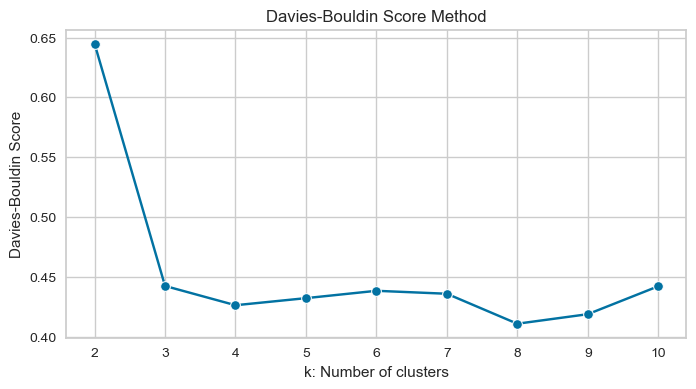

In [10]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Davies-Bouldin Score Method
db_scores = []
kmax = 10

for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(x, labels)
    db_scores.append(db_score)

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=db_scores, marker='o')
plt.title('Davies-Bouldin Score Method')
plt.xlabel("k: Number of clusters")
plt.ylabel("Davies-Bouldin Score")
plt.show()

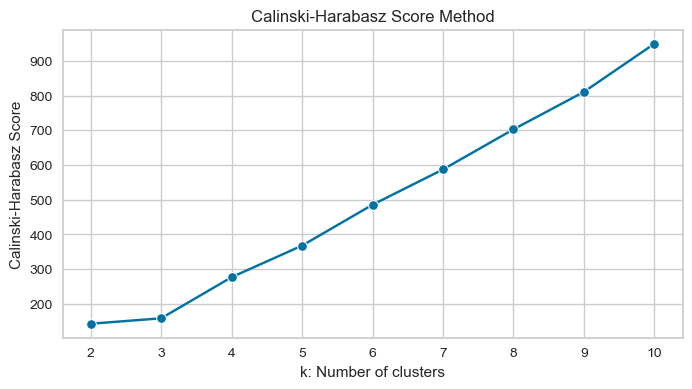

In [11]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Calinski-Harabasz Score Method
ch_scores = []
kmax = 10

for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(x, labels)
    ch_scores.append(ch_score)

# Plot Calinski-Harabasz Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=ch_scores, marker='o')
plt.title('Calinski-Harabasz Score Method')
plt.xlabel("k: Number of clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

In [12]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [13]:
# identified_clusters = kmeans.fit_predict(x)
# identified_clusters

In [14]:
# data_with_clusters = newdf.copy()
# data_with_clusters['cluster']=identified_clusters
# plt.figure(figsize=(15,7))
# plt.scatter(data_with_clusters['avg_elevation'], data_with_clusters['avg_diff_vs'], c=data_with_clusters['cluster'],cmap='rainbow')
# plt.xlabel("elevation")
# plt.ylabel("vertical")
# plt.show()

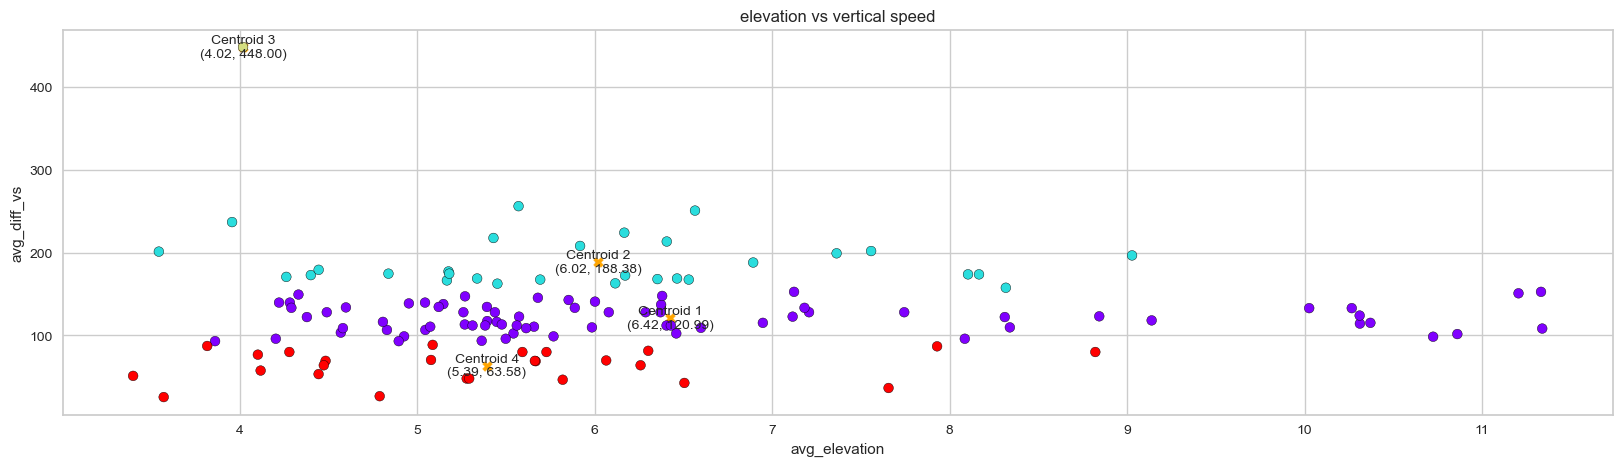

In [15]:
model2 = KMeans(n_clusters=4, max_iter=1000)
model2.fit(x)

labels = model2.labels_

# Add a new column "cluster" to your DataFrame
newdf['cluster_kmeans'] = labels

# Get cluster centers (centroids) from the fitted model
cluster = model2.cluster_centers_
centroids = np.array(cluster)

# Set up the plot
plt.figure(figsize=(20, 5))

# Plot centroids with orange color
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", color='orange')

# Annotate each centroid with its values
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}\n({centroid[0]:.2f}, {centroid[1]:.2f})', fontsize=10, ha='center', va='center')

# Plot data points with rainbow colors based on labels
plt.scatter(x='avg_elevation', y='avg_diff_vs', c=labels, cmap='rainbow', data=newdf, edgecolor='black')

# Set plot title and labels
plt.title('elevation vs vertical speed')
plt.ylabel('avg_diff_vs')
plt.xlabel('avg_elevation')

# Display the plot
plt.show()

In [16]:
#GMM

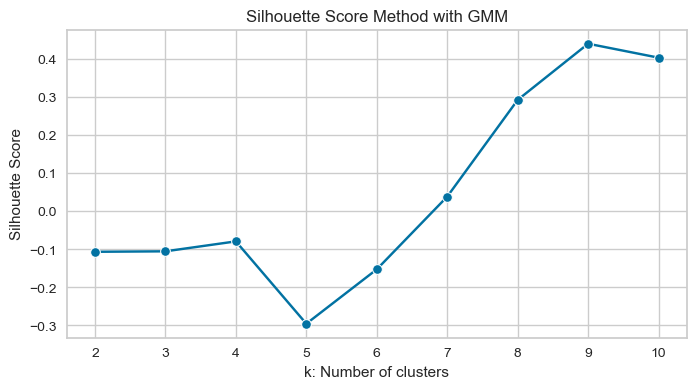

In [37]:
from sklearn.mixture import GaussianMixture
from yellowbrick.model_selection import validation_curve

n_components = 10

sil_scores = []
kmax = 10

for k in range(2, kmax + 1):
    gmm = GaussianMixture(n_components=k, random_state=42).fit(x)
    labels = gmm.predict(x)
    sil_score = silhouette_score(x, labels, metric='euclidean')
    sil_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=sil_scores, marker='o')
plt.title('Silhouette Score Method with GMM')
plt.xlabel("k: Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

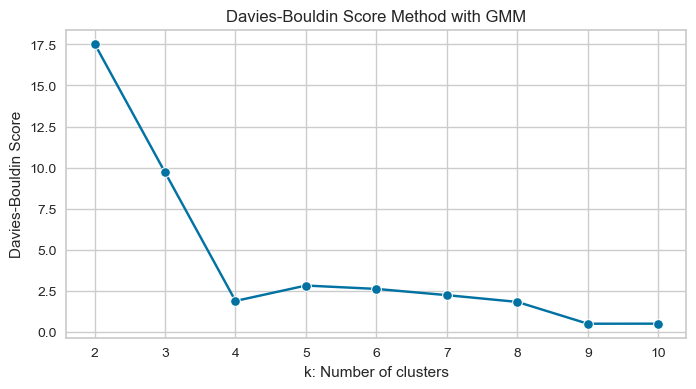

In [18]:
from sklearn.metrics import davies_bouldin_score
# Assuming 'm2' is your dataset
db_scores = []
kmax = 10

for k in range(2, kmax + 1):
    gmm = GaussianMixture(n_components=k, random_state=42).fit(x)
    labels = gmm.predict(x)
    db_score = davies_bouldin_score(x, labels)
    db_scores.append(db_score)

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=db_scores, marker='o')
plt.title('Davies-Bouldin Score Method with GMM')
plt.xlabel("k: Number of clusters")
plt.ylabel("Davies-Bouldin Score")
plt.show()

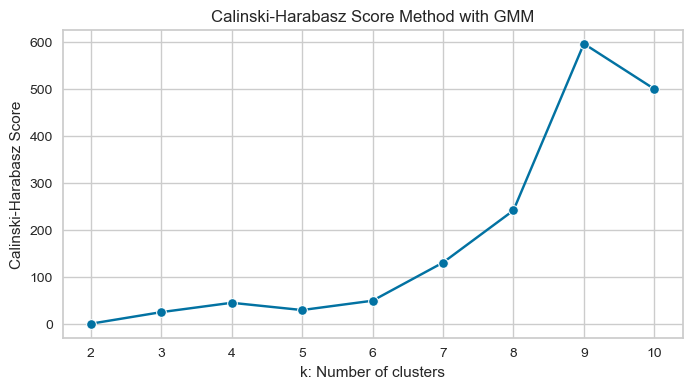

In [19]:
from sklearn.metrics import calinski_harabasz_score

# Assuming 'm2' is your dataset
ch_scores = []
kmax = 10

for k in range(2, kmax + 1):
    gmm = GaussianMixture(n_components=k, random_state=42).fit(x)
    labels = gmm.predict(x)
    ch_score = calinski_harabasz_score(x, labels)
    ch_scores.append(ch_score)

# Plot Calinski-Harabasz Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=ch_scores, marker='o')
plt.title('Calinski-Harabasz Score Method with GMM')
plt.xlabel("k: Number of clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

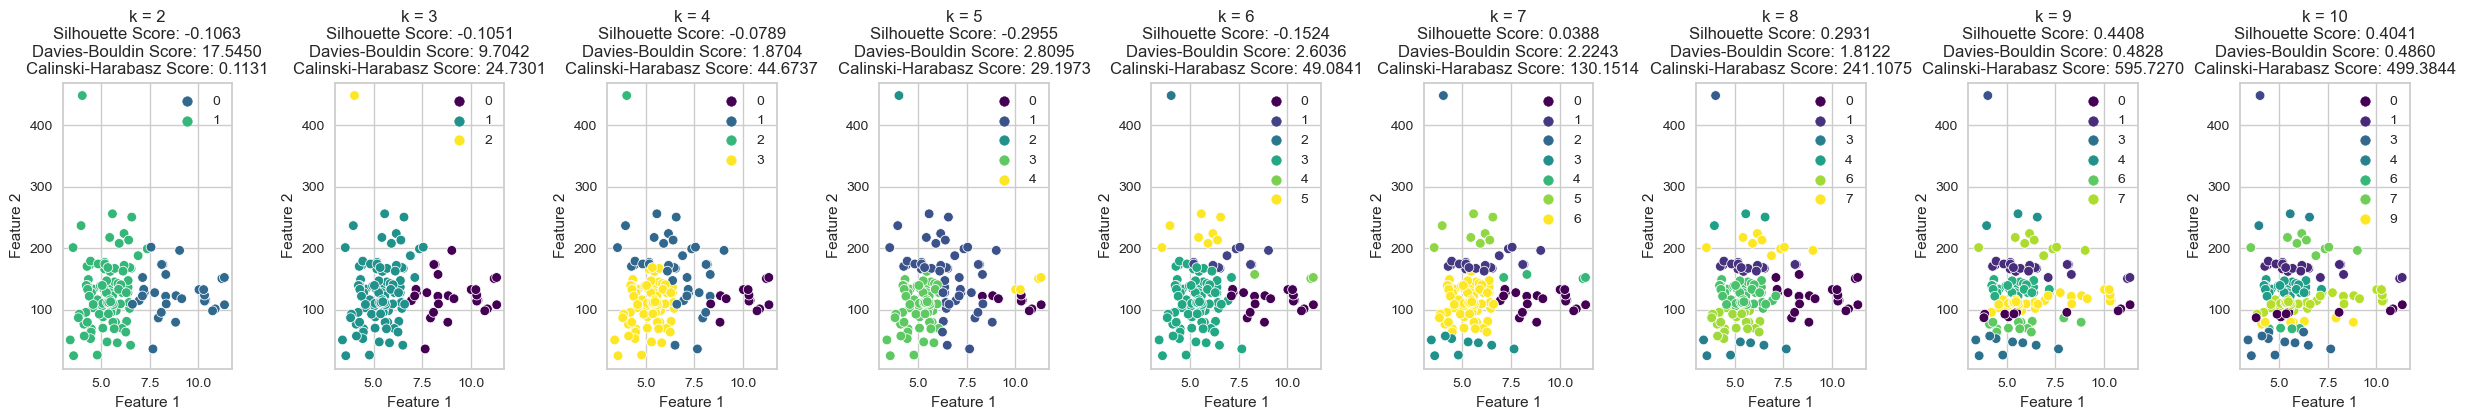

In [20]:
kmax = 10

# Increase the width of each subplot for better spacing
fig, axes = plt.subplots(nrows=1, ncols=kmax-1, figsize=(25, 5))

# Scores for each k
for k in range(2, kmax + 1):
    gmm = GaussianMixture(n_components=k, random_state=42).fit(x)
    labels = gmm.predict(x)

    sil_score = silhouette_score(x, labels, metric='euclidean')
    db_score = davies_bouldin_score(x, labels)
    ch_score = calinski_harabasz_score(x, labels)

    plt.subplot(1, kmax-1, k-1)
    sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=labels, palette='viridis')
    plt.title(f'k = {k}\nSilhouette Score: {sil_score:.4f}\nDavies-Bouldin Score: {db_score:.4f}\nCalinski-Harabasz Score: {ch_score:.4f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)
plt.show()

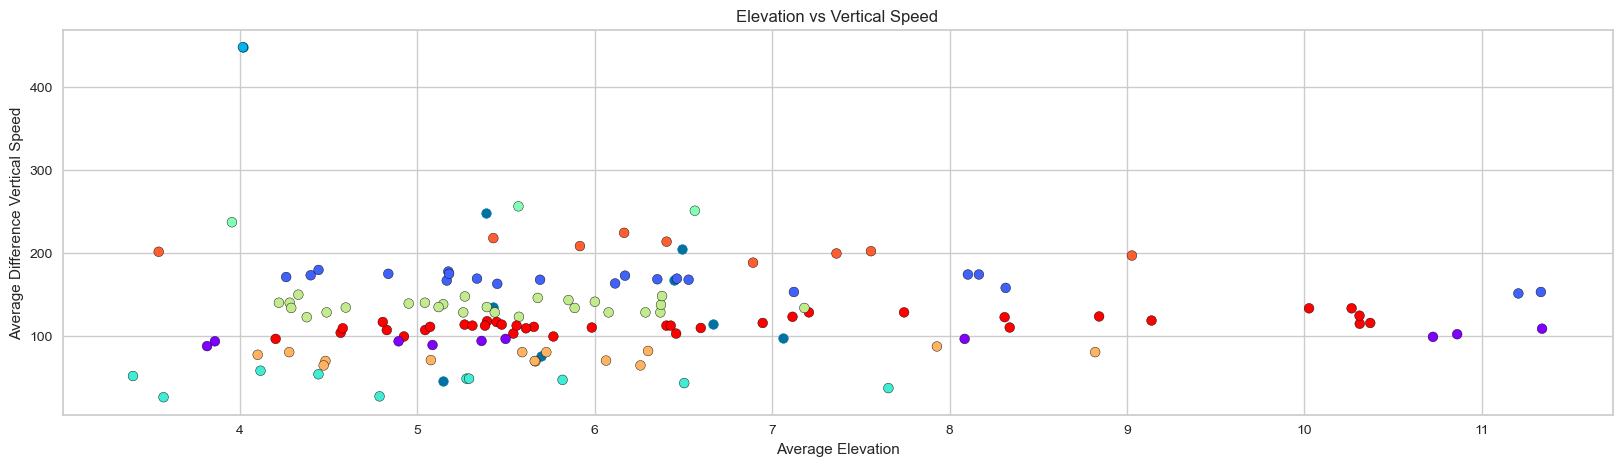

In [21]:
model2 = GaussianMixture(n_components=9, max_iter=1000, random_state=42)
model2.fit(x)

labels = model2.predict(x)

newdf['cluster_gmm'] = labels

cluster_centers = model2.means_

plt.figure(figsize=(20, 5))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1])

# for i, centroid in enumerate(cluster_centers):
#     plt.text(centroid[0], centroid[1], f'Centroid {i+1}\n({centroid[0]:.2f}, {centroid[1]:.2f})', fontsize=10, ha='center', va='center')

plt.scatter(x='avg_elevation', y='avg_diff_vs', c=labels, cmap='rainbow', data=newdf, edgecolor='black')

plt.title('Elevation vs Vertical Speed')
plt.xlabel('Average Elevation')
plt.ylabel('Average Difference Vertical Speed')

# Display the plot
plt.show()

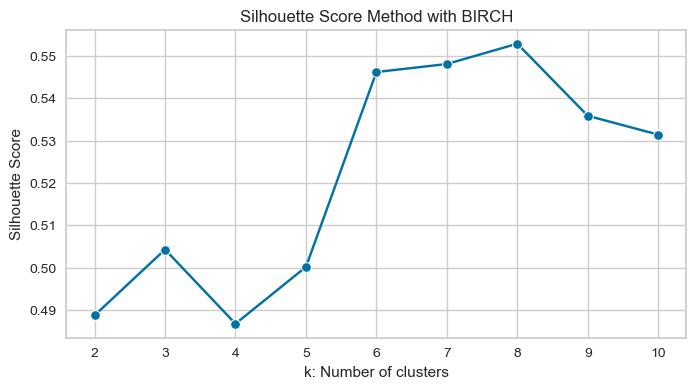

In [22]:
from sklearn.cluster import Birch

sil_scores = []
kmax = 10

for k in range(2, kmax + 1):
    birch = Birch(n_clusters=k)
    labels = birch.fit_predict(x)
    sil_score = silhouette_score(x, labels, metric='euclidean')
    sil_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=sil_scores, marker='o')
plt.title('Silhouette Score Method with BIRCH')
plt.xlabel("k: Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

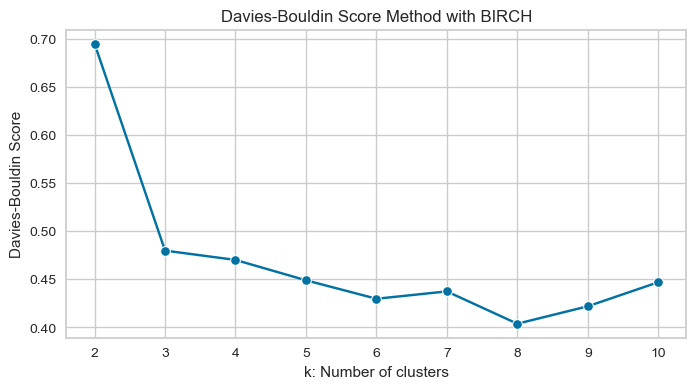

In [23]:
db_scores = []
kmax = 10

for k in range(2, kmax + 1):
    birch = Birch(n_clusters=k)
    labels = birch.fit_predict(x)
    db_score = davies_bouldin_score(x, labels)
    db_scores.append(db_score)

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=db_scores, marker='o')
plt.title('Davies-Bouldin Score Method with BIRCH')
plt.xlabel("k: Number of clusters")
plt.ylabel("Davies-Bouldin Score")
plt.show()


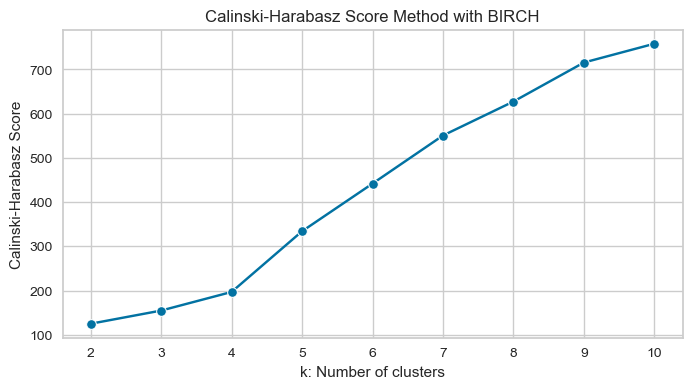

In [24]:
ch_scores = []
kmax = 10

for k in range(2, kmax + 1):
    birch = Birch(n_clusters=k)
    labels = birch.fit_predict(x)
    ch_score = calinski_harabasz_score(x, labels)
    ch_scores.append(ch_score)

# Plot Calinski-Harabasz Scores
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, kmax + 1), y=ch_scores, marker='o')
plt.title('Calinski-Harabasz Score Method with BIRCH')
plt.xlabel("k: Number of clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

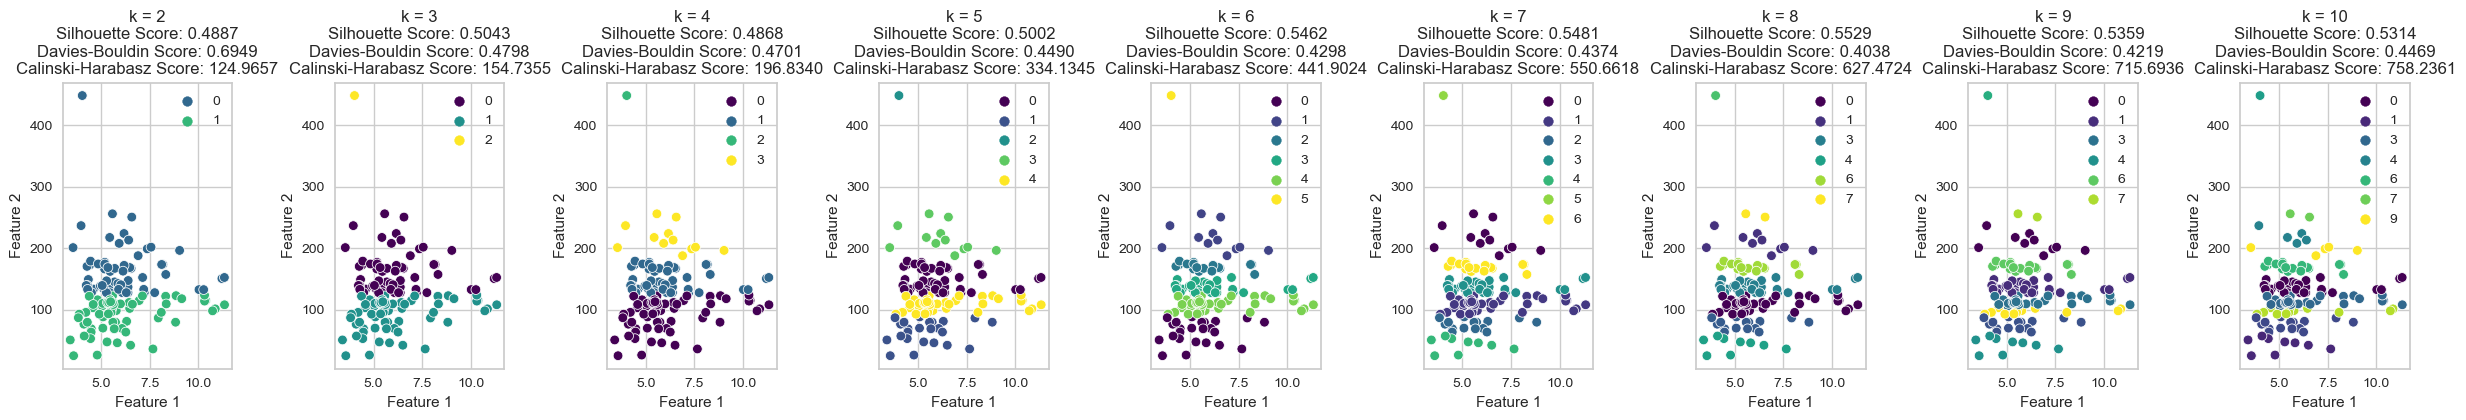

In [25]:
from sklearn.cluster import Birch
kmax = 10

# Increase the width of each subplot for better spacing
fig, axes = plt.subplots(nrows=1, ncols=kmax-1, figsize=(25, 5))

# Scores for each k
for k in range(2, kmax + 1):
    birch = Birch(n_clusters=k)
    labels = birch.fit_predict(x)

    sil_score = silhouette_score(x, labels, metric='euclidean')
    db_score = davies_bouldin_score(x, labels)
    ch_score = calinski_harabasz_score(x, labels)

    plt.subplot(1, kmax-1, k-1)
    sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=labels, palette='viridis')
    plt.title(f'k = {k}\nSilhouette Score: {sil_score:.4f}\nDavies-Bouldin Score: {db_score:.4f}\nCalinski-Harabasz Score: {ch_score:.4f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)
plt.show()

In [26]:
from sklearn.cluster import Birch
brc=Birch(branching_factor=50, n_clusters=8, threshold=1)
brc.fit(x)
labels=brc.predict(x)

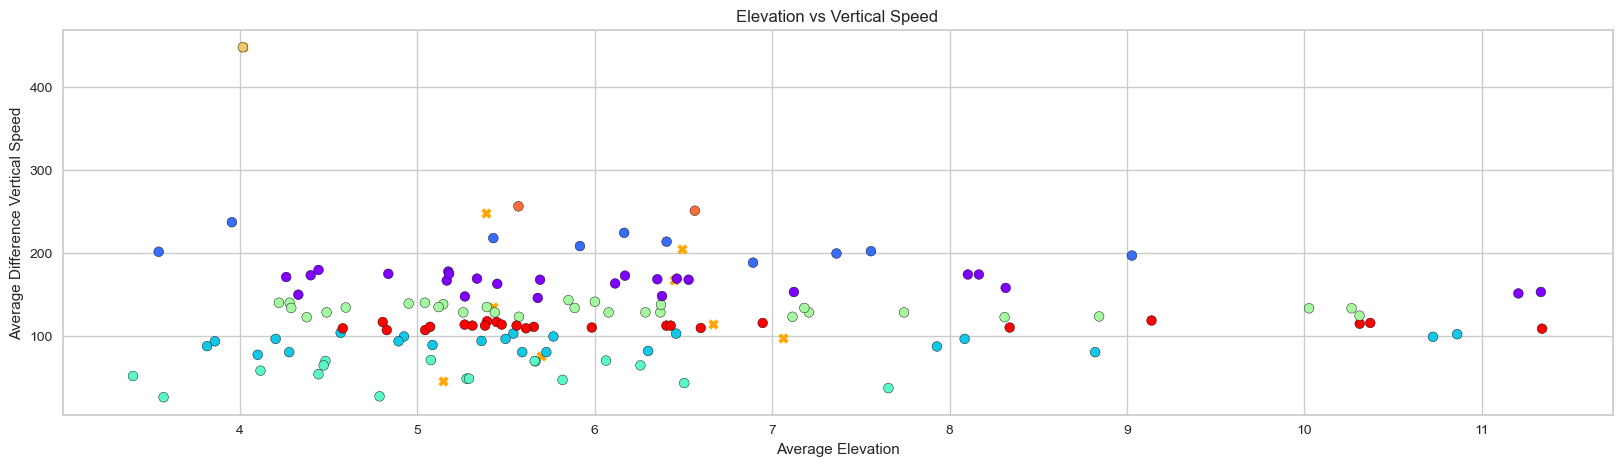

In [27]:
newdf['cluster_birch'] = labels

plt.figure(figsize=(20, 5))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="X", color='orange')

# for i, centroid in enumerate(cluster_centers):
#     plt.text(centroid[0], centroid[1], f'Centroid {i+1}\n({centroid[0]:.2f}, {centroid[1]:.2f})', fontsize=10, ha='center', va='center')

plt.scatter(x='avg_elevation', y='avg_diff_vs', c=labels, cmap='rainbow', data=newdf, edgecolor='black')

plt.title('Elevation vs Vertical Speed')
plt.xlabel('Average Elevation')
plt.ylabel('Average Difference Vertical Speed')

# Display the plot
plt.show()

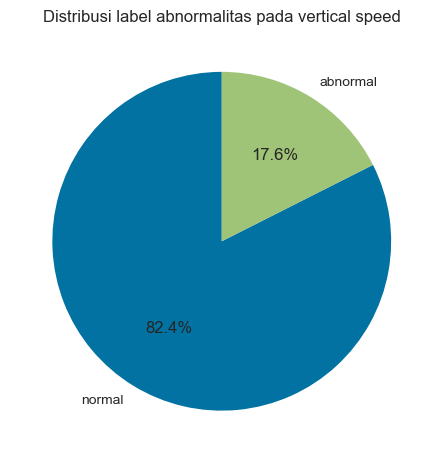

In [28]:
df['label_vertical_speed'] = 'abnormal'  # Default to 'abnormal'
df.loc[(df['avg_diff_vs'] >= 60) & (df['avg_diff_vs'] <= 180), 'label_vertical_speed'] = 'normal'

# Create a pie chart
category_counts = df['label_vertical_speed'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi label abnormalitas pada vertical speed')
plt.show()

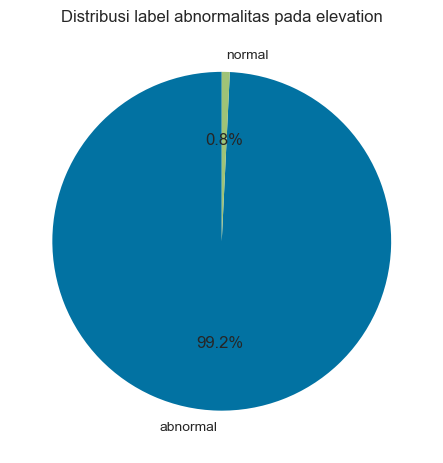

In [29]:
df['label_avg_elevation'] = 'abnormal'  # Default to 'abnormal'
df.loc[(df['avg_elevation'] >= 2.5) & (df['avg_elevation'] <= 3.5), 'label_avg_elevation'] = 'normal'

# Create a pie chart
category_counts = df['label_avg_elevation'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi label abnormalitas pada elevation')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


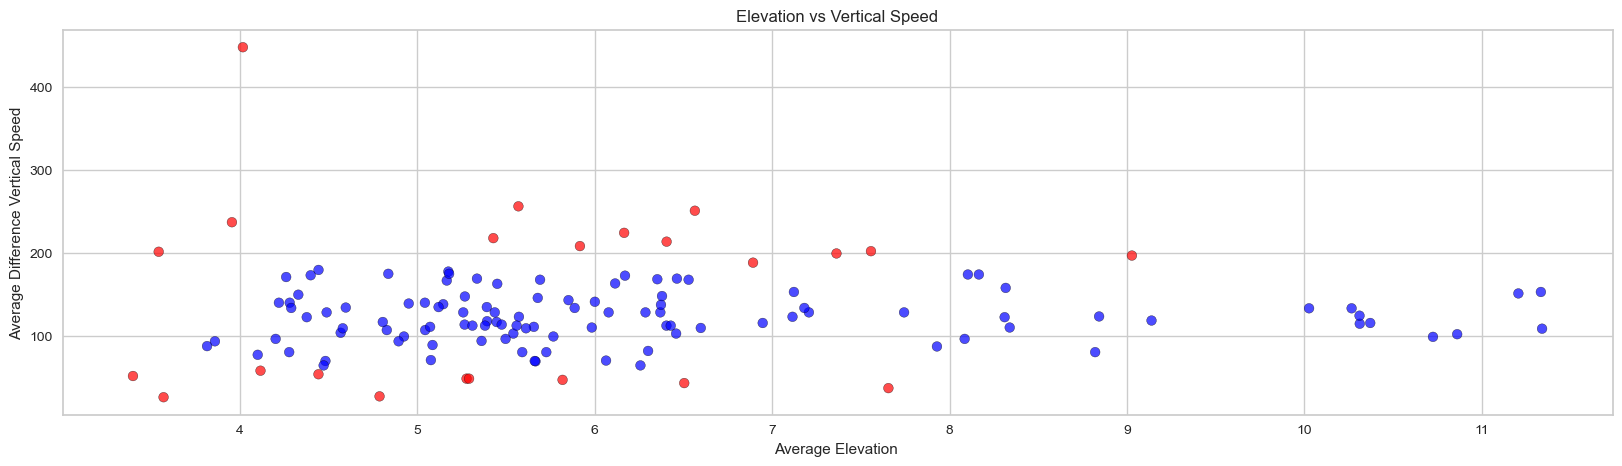

In [30]:
cluster_centers = model2.means_

# Create scatter plot
plt.figure(figsize=(20, 5))

# Color mapping dictionary
color_map = {'abnormal': 'red', 'normal': 'blue'}

# Plot data points with color based on 'label_vertical_speed'
plt.scatter(x=df['avg_elevation'], y=df['avg_diff_vs'], c=df['label_vertical_speed'].map(color_map), edgecolor='black', alpha=0.7)

# Plot settings
plt.title('Elevation vs Vertical Speed')
plt.xlabel('Average Elevation ')
plt.ylabel('Average Difference Vertical Speed')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


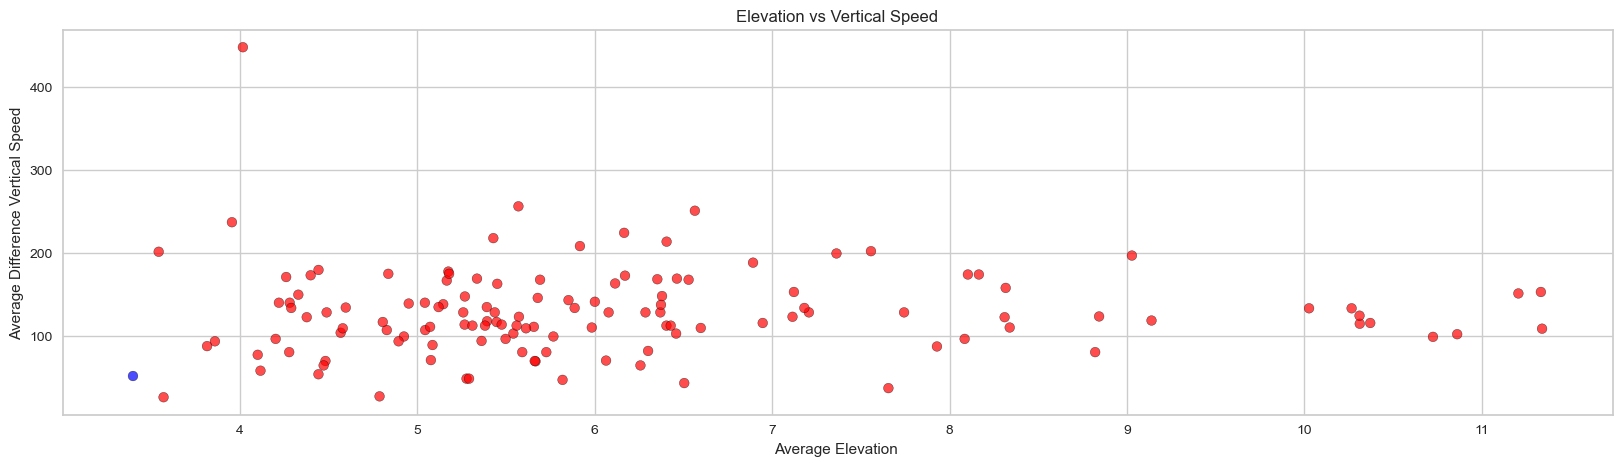

In [31]:
cluster_centers = model2.means_

# Create scatter plot
plt.figure(figsize=(20, 5))

# Color mapping dictionary
color_map = {'abnormal': 'red', 'normal': 'blue'}

# Plot data points with color based on 'label_vertical_speed'
plt.scatter(x=df['avg_elevation'], y=df['avg_diff_vs'], c=df['label_avg_elevation'].map(color_map), edgecolor='black', alpha=0.7)

# Plot settings
plt.title('Elevation vs Vertical Speed')
plt.xlabel('Average Elevation ')
plt.ylabel('Average Difference Vertical Speed')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [32]:
df = pd.concat([df, newdf['cluster_gmm']], axis=1)

In [33]:
cluster_counts = df.groupby(['cluster_gmm', 'label_vertical_speed']).size().unstack(fill_value=0)
# Print the cluster counts DataFrame
print("Cluster Counts:")
print(cluster_counts)
# Calculate and print the total counts of 'normal' and 'abnormal' data points for each cluster
for cluster in cluster_counts.index:
    total_normal = cluster_counts.loc[cluster, 'normal']
    total_abnormal = cluster_counts.loc[cluster, 'abnormal']
    print(f"\nCluster {cluster}:")
    print(f"Total Normal: {total_normal}")
    print(f"Total Abnormal: {total_abnormal}")

Cluster Counts:
label_vertical_speed  abnormal  normal
cluster_gmm                           
0                            0      10
1                            0      21
2                            1       0
3                           10       0
4                            3       0
5                            0      26
6                            0      14
7                            9       0
8                            0      37

Cluster 0:
Total Normal: 10
Total Abnormal: 0

Cluster 1:
Total Normal: 21
Total Abnormal: 0

Cluster 2:
Total Normal: 0
Total Abnormal: 1

Cluster 3:
Total Normal: 0
Total Abnormal: 10

Cluster 4:
Total Normal: 0
Total Abnormal: 3

Cluster 5:
Total Normal: 26
Total Abnormal: 0

Cluster 6:
Total Normal: 14
Total Abnormal: 0

Cluster 7:
Total Normal: 0
Total Abnormal: 9

Cluster 8:
Total Normal: 37
Total Abnormal: 0


In [34]:
# df.to_csv('df_GMM_aim.csv')

In [35]:
cluster_counts = df.groupby(['cluster_gmm', 'label_avg_elevation']).size().unstack(fill_value=0)
# Print the cluster counts DataFrame
print("Cluster Counts:")
print(cluster_counts)
# Calculate and print the total counts of 'normal' and 'abnormal' data points for each cluster
for cluster in cluster_counts.index:
    total_normal = cluster_counts.loc[cluster, 'normal']
    total_abnormal = cluster_counts.loc[cluster, 'abnormal']
    print(f"\nCluster {cluster}:")
    print(f"Total Normal: {total_normal}")
    print(f"Total Abnormal: {total_abnormal}")

Cluster Counts:
label_avg_elevation  abnormal  normal
cluster_gmm                          
0                          10       0
1                          21       0
2                           1       0
3                           9       1
4                           3       0
5                          26       0
6                          14       0
7                           9       0
8                          37       0

Cluster 0:
Total Normal: 0
Total Abnormal: 10

Cluster 1:
Total Normal: 0
Total Abnormal: 21

Cluster 2:
Total Normal: 0
Total Abnormal: 1

Cluster 3:
Total Normal: 1
Total Abnormal: 9

Cluster 4:
Total Normal: 0
Total Abnormal: 3

Cluster 5:
Total Normal: 0
Total Abnormal: 26

Cluster 6:
Total Normal: 0
Total Abnormal: 14

Cluster 7:
Total Normal: 0
Total Abnormal: 9

Cluster 8:
Total Normal: 0
Total Abnormal: 37


In [36]:
df

,Unnamed: 0,label,tanggal,heading,aircraft_code,registration,callsign,avg_elevation,avg_altitude_m,avg_diff_vs,label_vertical_speed,label_avg_elevation,cluster_gmm
0,0,1,9/26/2022,18,B739,PK-LGR,LNI276,5.818741,233.449091,46.545455,abnormal,abnormal,3
1,1,2,9/26/2022,36,B739,PK-LHQ,LNI140,6.300770,201.583636,81.454545,normal,abnormal,6
2,2,3,9/26/2022,36,A320,PK-SJU,SJV837,8.316118,184.052308,157.538462,normal,abnormal,1
3,3,4,9/26/2022,36,A320,PK-GLY,CTV938,5.656915,195.349091,110.545455,normal,abnormal,8
4,4,5,9/26/2022,36,AT76,PK-WJP,WON1243,7.655067,186.145714,36.571429,abnormal,abnormal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,127,10/4/2022,36,A320,PK-LUQ,BTK7065,5.475700,156.503077,113.230769,normal,abnormal,8
127,127,128,10/5/2022,36,A320,PK-GQA,CTV934,3.859506,160.020000,93.090909,normal,abnormal,0
128,128,129,10/5/2022,36,AT76,PK-WHI,WON1231,3.397694,228.600000,51.200000,abnormal,normal,3
129,129,130,10/5/2022,36,B739,PK-LHS,LNI239,3.542663,179.614286,201.142857,abnormal,abnormal,7
